In [1]:
import numpy as np
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import matplotlib.pyplot as plt
%matplotlib inlin

In [84]:
sample = np.random.random_integers(0, 255, (21, 21))
_sample = np.zeros((23, 23))
_sample[1:-1, 1:-1] = sample
sample = _sample
x = np.random.random_integers(3, 12)
y = np.random.random_integers(3, 12)
w = 3
img = np.zeros((21, 21))
img[11:14, 11:14] = sample[x:x+3, y:y+3]
patches = image.extract_patches_2d(sample, (w, w))
mask = np.random.random_integers(0, 1, (w, w))

In [38]:
class Test:
    def __init__(self, x):
        self.x = x
    def __str__(self):
        return str(self.x)
    def __unicode__(self):
        return str(self.x)
sorted([Test(12), Test(24), Test(13)], key=lambda x: x.x)

[<__main__.Test instance at 0x000000000E09E5C8>,
 <__main__.Test instance at 0x000000000E09EC88>,
 <__main__.Test instance at 0x000000000E09E748>]

In [15]:
window_size = 11
half_w = window_size / 2

img = mpimg.imread('gravel.jpg')
# so far we will work with 
gray_image = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]

img = gray_image[:256, :256]

w = img.shape[0] + half_w * 2
h = img.shape[1] + half_w * 2

# pad image with zeros 
_sample = np.zeros((w, h))
_sample[half_w:-half_w, half_w:-half_w] = img
sample = _sample

# new image we would like to generate
image_size = (100, 100)
target = np.zeros(image_size)

# seed the image
rand_x = np.random.randint(half_w, img.shape[0] - 3 - half_w)
rand_y = np.random.randint(half_w, img.shape[1] - 3 - half_w)
seed_size = 3
seed = sample[rand_x:rand_x + seed_size, rand_y:rand_y + seed_size]
center_x = (image_size[0] - seed_size) / 2
center_y = (image_size[1] - seed_size) / 2 

target[center_x:center_x + seed_size, center_y:center_y + seed_size] = seed

In [16]:
gauss_mask = get_gauss_mask(window_size)
patches = image.extract_patches_2d(sample, (window_size, window_size))

In [17]:
# compute neighbors
template = target[center_x-half_w:center_x+half_w + 1, center_x-half_w:center_x+half_w + 1]
mask = template != 0
total_weight = np.sum(gauss_mask * mask)
SSD = np.sum(((patches - template) ** 2) * (gauss_mask * mask), axis=(1, 2)) / float(total_weight)
min_err = SSD.min()
min_idx = np.unravel_index(SSD.argmin(), img.shape)
# SSD <= (min_err * (1.1))
candidates = [np.unravel_index(i, img.shape) for i, err in enumerate(SSD) if err <= min_err * 1.1]

In [29]:
max_err_treshold = 0.3
def get_candidate_list(template, gauss_mask, patches):
    mask = template != 0
    total_weight = np.sum(gauss_mask * mask)
    SSD = np.sum(((patches - template) ** 2) * (gauss_mask * mask), axis=(1, 2)) / float(total_weight)
    min_err = SSD.min()
    candidates = [np.unravel_index(i, img.shape) for i, err in enumerate(SSD) if err <= min_err * 1.1]
    return candidates

[(102, 68)]

In [14]:
def get_gauss_mask(window_size):
    gauss = np.zeros((window_size, window_size))
    center = window_size / 2
    sigma = window_size / 6.4
    for x in xrange(window_size):
        for y in xrange(window_size):
            left = np.power(x - center, 2) / (2 * np.power(sigma, 2))
            right = np.power(y - center, 2) / (2 * np.power(sigma, 2))
            gauss[x, y] = np.exp(-(left + right))
    return gauss

array([[ 0.00142498,  0.0166391 ,  0.03774886,  0.0166391 ,  0.00142498],
       [ 0.0166391 ,  0.19429066,  0.44078414,  0.19429066,  0.0166391 ],
       [ 0.03774886,  0.44078414,  1.        ,  0.44078414,  0.03774886],
       [ 0.0166391 ,  0.19429066,  0.44078414,  0.19429066,  0.0166391 ],
       [ 0.00142498,  0.0166391 ,  0.03774886,  0.0166391 ,  0.00142498]])

In [265]:
gauss_mask * mask

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  4,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  3,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  8,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [245]:
SSD.reshape(img.shape)

array([[ 0.23637893,  0.14550621,  0.09458293, ...,  0.36329797,
         1.56831139,  2.51845677],
       [ 0.44154126,  0.39484708,  0.25062728, ...,  0.52568389,
         1.72603731,  2.56580691],
       [ 0.31848158,  0.38395209,  0.27588783, ...,  0.4346919 ,
         1.52982306,  2.47426769],
       ..., 
       [ 0.27365651,  0.25890834,  0.18920329, ...,  0.18483206,
         1.42906329,  2.45702426],
       [ 1.76697566,  1.87415597,  1.76702906, ...,  1.53437478,
         2.31579718,  2.85531162],
       [ 2.1125564 ,  2.18025453,  2.18558488, ...,  2.05069035,
         2.62629558,  3.01094126]])

In [32]:
from collections import namedtuple

In [33]:
mpimg.imsave("test.png", sample[:128, :128], cmap=plt.get_cmap('gray'))

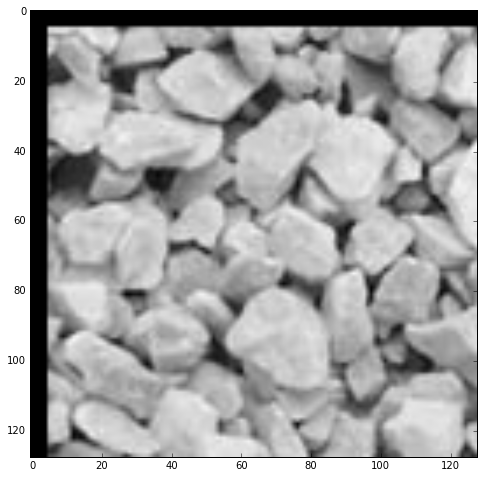

In [31]:
plt.figure(figsize=(12, 8))
plt.imshow(sample[:128, :128], cmap=plt.get_cmap('gray'))

In [90]:
# distances to ALL pixels
SSD = np.sum(((patches - template) ** 2) * mask, axis=(1, 2))
min_ssd = SSD.min()
# (i, j, err)

In [100]:
s = SSD.reshape((21, 21))
np.unravel_index(s.argmin(), s.shape)

(4, 20)

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [107]:
img = mpimg.imread('stinkbug.png')

In [126]:
print ''

In [123]:
sample.shape

(23L, 23L)

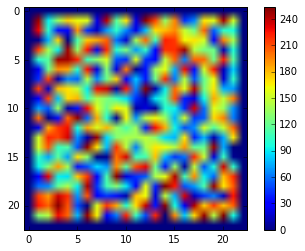

In [121]:
plt.imshow(sample, )
plt.colorbar()

In [88]:
patches * mask

array([[[   0.,    0.,    0.],
        [   0.,  248.,   92.],
        [   0.,    0.,  103.]],

       [[   0.,    0.,    0.],
        [   0.,   92.,  135.],
        [ 230.,    0.,   35.]],

       [[   0.,    0.,    0.],
        [   0.,  135.,  174.],
        [ 103.,    0.,   33.]],

       ..., 
       [[ 175.,  215.,  178.],
        [   0.,  144.,  253.],
        [   0.,    0.,    0.]],

       [[ 215.,  178.,  206.],
        [   0.,  253.,   96.],
        [   0.,    0.,    0.]],

       [[ 178.,  206.,    0.],
        [   0.,   96.,    0.],
        [   0.,    0.,    0.]]])

In [58]:
inx = np.sum((((patches - np.ones((3, 3))) ** 2) * template), axis=(1, 2)).argmin()
low = np.sum((((patches - np.ones((3, 3))) ** 2) * template), axis=(1, 2)).min()
patches[inx] # best patch
print low

205877.0
